In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import json
import numpy as np

# 3차 모델링(토큰 라벨링)

## 중간 결과 시각화

In [2]:
train_64_40 = []
train_64_50 = []
train_64_70 = []
train_80_90 = []
train_100_100 = []
train_100_200 = []

with open("model_storage/labeling_model_1/train_state_64_40.json", mode="r+", encoding="utf-8") as fp:
    train_64_40 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_64_50.json", mode="r+", encoding="utf-8") as fp:
    train_64_50 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_64_70.json", mode="r+", encoding="utf-8") as fp:
    train_64_70 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_80_90.json", mode="r+", encoding="utf-8") as fp:
    train_80_90 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_100_100.json", mode="r+", encoding="utf-8") as fp:
    train_100_100 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_100_200.json", mode="r+", encoding="utf-8") as fp:
    train_100_200 = json.loads(fp.read())

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12

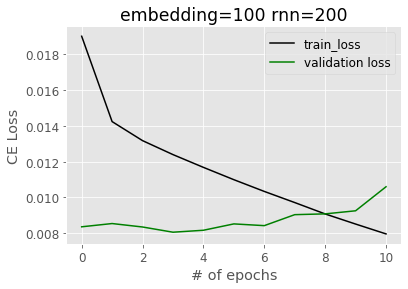

In [4]:
fig, ax = plt.subplots()
ax.set_title("embedding=100 rnn=200")
ax.plot(train_100_200["train_loss"], color='black')
ax.plot(train_100_200["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

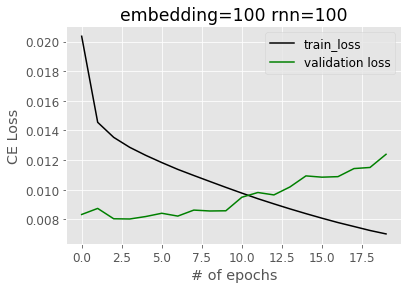

In [5]:
fig, ax = plt.subplots()
ax.set_title("embedding=100 rnn=100")
ax.plot(train_100_100["train_loss"], color='black')
ax.plot(train_100_100["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

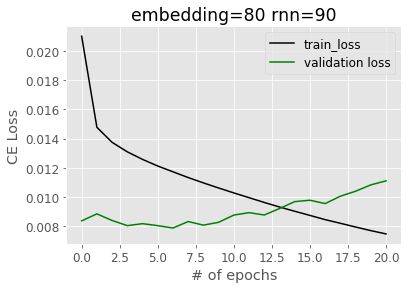

In [6]:
fig, ax = plt.subplots()
ax.set_title("embedding=80 rnn=90")
ax.plot(train_80_90["train_loss"], color='black')
ax.plot(train_80_90["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

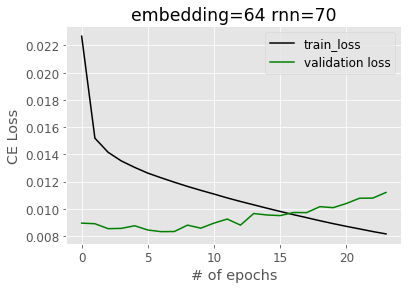

In [7]:
fig, ax = plt.subplots()
ax.set_title("embedding=64 rnn=70")
ax.plot(train_64_70["train_loss"], color='black')
ax.plot(train_64_70["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

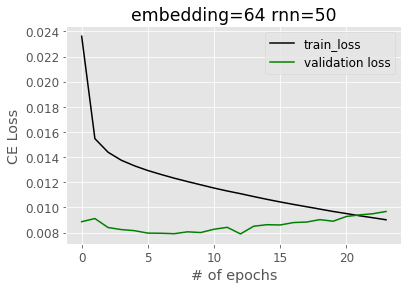

In [8]:
fig, ax = plt.subplots()
ax.set_title("embedding=64 rnn=50")
ax.plot(train_64_50["train_loss"], color='black')
ax.plot(train_64_50["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

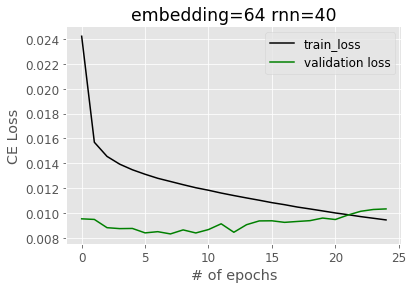

In [9]:
fig, ax = plt.subplots()
ax.set_title("embedding=64 rnn=40")
ax.plot(train_64_40["train_loss"], color='black')
ax.plot(train_64_40["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()